In [100]:
import pandas as pd
import numpy as np

# Step 1 - import data

In [101]:
FF = pd.read_csv("data+files/Fama_French_daily.csv") # Fama-French Dataset
daily_prices = pd.read_parquet("data+files/sp500_daily_prices.parquet")

Mkt: Refere-se ao retorno do mercado. Este é o retorno de um portfólio amplo de ações, como o retorno do mercado de ações em geral (por exemplo, S&P 500).
RF: Refere-se à taxa livre de risco (Risk-Free rate). Esta é a taxa de retorno de um investimento considerado livre de risco, como os títulos do governo dos EUA de curto prazo.
Mkt_RF: É o retorno excedente do mercado sobre a taxa livre de risco.

In [102]:
FF

,date,Mkt_RF,SMB,HML,RF
0,19260701,0.10,-0.25,-0.27,0.009
1,19260702,0.45,-0.33,-0.06,0.009
2,19260706,0.17,0.30,-0.39,0.009
3,19260707,0.09,-0.58,0.02,0.009
4,19260708,0.21,-0.38,0.19,0.009
...,...,...,...,...,...
25518,20230626,-0.48,-0.32,1.30,0.019
25519,20230627,1.21,0.47,-0.51,0.019
25520,20230628,0.04,0.55,-0.40,0.019
25521,20230629,0.44,0.53,0.77,0.019


In [103]:
daily_prices

,date,close,symbol
2544,2010-01-04,31.30,A
2545,2010-01-05,30.96,A
2546,2010-01-06,30.85,A
2547,2010-01-07,30.81,A
2548,2010-01-08,30.80,A
...,...,...,...
24292494,2023-08-01,185.51,ZTS
24292495,2023-08-02,182.00,ZTS
24292496,2023-08-03,180.88,ZTS
24292497,2023-08-04,178.63,ZTS


## Step 2: Cleaning, Calculations and Merging
1) Parse dates
2) Fama-French Dataset - Calculate Market Return and rescale
3) Daily Stocks Dataset - Calculate daily returns
4) Merge
5) Calculate daily excess returns
6) Detect and delete outliers
7) Exploratory statistics

In [104]:
FF.head()

,date,Mkt_RF,SMB,HML,RF
0,19260701,0.10,-0.25,-0.27,0.009
1,19260702,0.45,-0.33,-0.06,0.009
2,19260706,0.17,0.30,-0.39,0.009
3,19260707,0.09,-0.58,0.02,0.009
4,19260708,0.21,-0.38,0.19,0.009


In [105]:
FF.date = pd.to_datetime(FF.date, format="%Y%m%d")

In [106]:
FF

,date,Mkt_RF,SMB,HML,RF
0,1926-07-01,0.10,-0.25,-0.27,0.009
1,1926-07-02,0.45,-0.33,-0.06,0.009
2,1926-07-06,0.17,0.30,-0.39,0.009
3,1926-07-07,0.09,-0.58,0.02,0.009
4,1926-07-08,0.21,-0.38,0.19,0.009
...,...,...,...,...,...
25518,2023-06-26,-0.48,-0.32,1.30,0.019
25519,2023-06-27,1.21,0.47,-0.51,0.019
25520,2023-06-28,0.04,0.55,-0.40,0.019
25521,2023-06-29,0.44,0.53,0.77,0.019


In [107]:
FF["Mkt"] = FF.Mkt_RF + FF.RF

In [108]:
FF

,date,Mkt_RF,SMB,HML,RF,Mkt
0,1926-07-01,0.10,-0.25,-0.27,0.009,0.109
1,1926-07-02,0.45,-0.33,-0.06,0.009,0.459
2,1926-07-06,0.17,0.30,-0.39,0.009,0.179
3,1926-07-07,0.09,-0.58,0.02,0.009,0.099
4,1926-07-08,0.21,-0.38,0.19,0.009,0.219
...,...,...,...,...,...,...
25518,2023-06-26,-0.48,-0.32,1.30,0.019,-0.461
25519,2023-06-27,1.21,0.47,-0.51,0.019,1.229
25520,2023-06-28,0.04,0.55,-0.40,0.019,0.059
25521,2023-06-29,0.44,0.53,0.77,0.019,0.459


In [109]:
FF.loc[:, "Mkt_RF":"Mkt"] = FF.loc[:, "Mkt_RF":"Mkt"]/100

In [110]:
FF

,date,Mkt_RF,SMB,HML,RF,Mkt
0,1926-07-01,0.0010,-0.0025,-0.0027,0.00009,0.00109
1,1926-07-02,0.0045,-0.0033,-0.0006,0.00009,0.00459
2,1926-07-06,0.0017,0.0030,-0.0039,0.00009,0.00179
3,1926-07-07,0.0009,-0.0058,0.0002,0.00009,0.00099
4,1926-07-08,0.0021,-0.0038,0.0019,0.00009,0.00219
...,...,...,...,...,...,...
25518,2023-06-26,-0.0048,-0.0032,0.0130,0.00019,-0.00461
25519,2023-06-27,0.0121,0.0047,-0.0051,0.00019,0.01229
25520,2023-06-28,0.0004,0.0055,-0.0040,0.00019,0.00059
25521,2023-06-29,0.0044,0.0053,0.0077,0.00019,0.00459


In [111]:
daily_prices.head()

,date,close,symbol
2544,2010-01-04,31.30,A
2545,2010-01-05,30.96,A
2546,2010-01-06,30.85,A
2547,2010-01-07,30.81,A
2548,2010-01-08,30.80,A


In [112]:
daily_prices["ret"] = daily_prices.groupby("symbol")["close"].pct_change(1)

In [113]:
daily_prices

,date,close,symbol,ret
2544,2010-01-04,31.30,A,NaN
2545,2010-01-05,30.96,A,-0.010863
2546,2010-01-06,30.85,A,-0.003553
2547,2010-01-07,30.81,A,-0.001297
2548,2010-01-08,30.80,A,-0.000325
...,...,...,...,...
24292494,2023-08-01,185.51,ZTS,-0.013717
24292495,2023-08-02,182.00,ZTS,-0.018921
24292496,2023-08-03,180.88,ZTS,-0.006154
24292497,2023-08-04,178.63,ZTS,-0.012439


In [114]:
data = (daily_prices
        .merge(FF[["date", "Mkt"]], on="date", how="inner")
        .sort_values(["symbol", "date"]))

In [115]:
data.loc[data["symbol"] == "AAPL"]

,date,close,symbol,ret,Mkt
2,2010-01-04,7.6432,AAPL,NaN,0.01690
433,2010-01-05,7.6564,AAPL,0.001727,0.00310
864,2010-01-06,7.5346,AAPL,-0.015908,0.00130
1296,2010-01-07,7.5207,AAPL,-0.001845,0.00400
1728,2010-01-08,7.5707,AAPL,0.006648,0.00330
...,...,...,...,...,...
1595893,2023-06-26,185.2700,AAPL,-0.007553,-0.00461
1596385,2023-06-27,188.0600,AAPL,0.015059,0.01229
1596877,2023-06-28,189.2500,AAPL,0.006328,0.00059
1597369,2023-06-29,189.5900,AAPL,0.001797,0.00459


In [116]:
data["excess_ret"] = data.ret - data.Mkt

In [117]:
data

,date,close,symbol,ret,Mkt,excess_ret
0,2010-01-04,31.30,A,NaN,0.01690,NaN
431,2010-01-05,30.96,A,-0.010863,0.00310,-0.013963
862,2010-01-06,30.85,A,-0.003553,0.00130,-0.004853
1294,2010-01-07,30.81,A,-0.001297,0.00400,-0.005297
1726,2010-01-08,30.80,A,-0.000325,0.00330,-0.003625
...,...,...,...,...,...,...
1596382,2023-06-26,167.54,ZTS,-0.004930,-0.00461,-0.000320
1596874,2023-06-27,170.67,ZTS,0.018682,0.01229,0.006392
1597366,2023-06-28,169.10,ZTS,-0.009199,0.00059,-0.009789
1597858,2023-06-29,171.87,ZTS,0.016381,0.00459,0.011791


In [118]:
data.describe()

,date,close,ret,Mkt,excess_ret
count,1598351,1.598351e+06,1.597859e+06,1.598351e+06,1.597859e+06
mean,2016-11-20 14:37:36.100694016,9.879279e+01,6.527672e-04,5.449980e-04,1.121120e-04
min,2010-01-04 00:00:00,6.990000e-01,-8.205564e-01,-1.199400e-01,-8.227364e-01
25%,2013-07-30 00:00:00,3.509000e+01,-8.191202e-03,-4.020000e-03,-7.071735e-03
50%,2016-12-12 00:00:00,6.078000e+01,6.826521e-04,7.700000e-04,-6.954733e-05
75%,2020-03-31 00:00:00,1.073700e+02,9.552057e-03,6.000000e-03,7.058342e-03
max,2023-06-30 00:00:00,6.350620e+03,9.270531e+00,9.346000e-02,9.262831e+00
std,NaN,1.807181e+02,2.349120e-02,1.147060e-02,2.046229e-02


In [119]:
data.symbol.nunique()

492

## Step 3: Calculate Momentum Indicators/Proxies
100-Day & 200-Day Simple Moving Averages (SMA)

In [120]:
data = data.set_index("date")
data

,close,symbol,ret,Mkt,excess_ret
date,,,,,
2010-01-04,31.30,A,NaN,0.01690,NaN
2010-01-05,30.96,A,-0.010863,0.00310,-0.013963
2010-01-06,30.85,A,-0.003553,0.00130,-0.004853
2010-01-07,30.81,A,-0.001297,0.00400,-0.005297
2010-01-08,30.80,A,-0.000325,0.00330,-0.003625
...,...,...,...,...,...
2023-06-26,167.54,ZTS,-0.004930,-0.00461,-0.000320
2023-06-27,170.67,ZTS,0.018682,0.01229,0.006392
2023-06-28,169.10,ZTS,-0.009199,0.00059,-0.009789


In [121]:
MA_100 = data.groupby("symbol").rolling(100)["excess_ret"].mean().reset_index()
MA_200 = data.groupby("symbol").rolling(200)["excess_ret"].mean().reset_index()

In [122]:
MA_200.head(2)

,symbol,date,excess_ret
0,A,2010-01-04,NaN
1,A,2010-01-05,NaN


In [123]:
MA_100= MA_100.rename({"excess_ret":"MA_100"},axis=1)
MA_200= MA_200.rename({"excess_ret":"MA_200"},axis=1)

In [124]:
MA_100.head()

,symbol,date,MA_100
0,A,2010-01-04,NaN
1,A,2010-01-05,NaN
2,A,2010-01-06,NaN
3,A,2010-01-07,NaN
4,A,2010-01-08,NaN


In [125]:
data = data.reset_index()
data.head(2)

,date,close,symbol,ret,Mkt,excess_ret
0,2010-01-04,31.30,A,NaN,0.0169,NaN
1,2010-01-05,30.96,A,-0.010863,0.0031,-0.013963


In [126]:
data = data.merge(MA_100, on= ["symbol", "date"])
data = data.merge(MA_200, on= ["symbol", "date"])

In [127]:
data.head(10)

,date,close,symbol,ret,Mkt,excess_ret,MA_100,MA_200
0,2010-01-04,31.30,A,NaN,0.0169,NaN,NaN,NaN
1,2010-01-05,30.96,A,-0.010863,0.0031,-0.013963,NaN,NaN
2,2010-01-06,30.85,A,-0.003553,0.0013,-0.004853,NaN,NaN
3,2010-01-07,30.81,A,-0.001297,0.0040,-0.005297,NaN,NaN
4,2010-01-08,30.80,A,-0.000325,0.0033,-0.003625,NaN,NaN
5,2010-01-11,30.82,A,0.000649,0.0013,-0.000651,NaN,NaN
6,2010-01-12,30.45,A,-0.012005,-0.0100,-0.002005,NaN,NaN
7,2010-01-13,30.69,A,0.007882,0.0085,-0.000618,NaN,NaN
8,2010-01-14,31.15,A,0.014989,0.0024,0.012589,NaN,NaN
9,2010-01-15,30.43,A,-0.023114,-0.0112,-0.011914,NaN,NaN


In [128]:
data = data.dropna()

In [129]:
data

,date,close,symbol,ret,Mkt,excess_ret,MA_100,MA_200
200,2010-10-19,34.02,A,-0.018465,-0.01669,-0.001775,-0.000075,0.000272
201,2010-10-20,34.66,A,0.018812,0.01061,0.008202,0.000009,0.000383
202,2010-10-21,34.75,A,0.002597,0.00111,0.001487,0.000106,0.000414
203,2010-10-22,34.75,A,0.000000,0.00291,-0.002910,0.000105,0.000426
204,2010-10-25,34.90,A,0.004317,0.00311,0.001207,0.000116,0.000451
...,...,...,...,...,...,...,...,...
1598346,2023-06-26,167.54,ZTS,-0.004930,-0.00461,-0.000320,-0.000390,-0.000126
1598347,2023-06-27,170.67,ZTS,0.018682,0.01229,0.006392,-0.000346,0.000005
1598348,2023-06-28,169.10,ZTS,-0.009199,0.00059,-0.009789,-0.000478,-0.000144
1598349,2023-06-29,171.87,ZTS,0.016381,0.00459,0.011791,-0.000279,-0.000093


## Step 4: Calculate forward-looking returns windows
50-day, 100-day, 200-day returns

In [130]:
data

,date,close,symbol,ret,Mkt,excess_ret,MA_100,MA_200
200,2010-10-19,34.02,A,-0.018465,-0.01669,-0.001775,-0.000075,0.000272
201,2010-10-20,34.66,A,0.018812,0.01061,0.008202,0.000009,0.000383
202,2010-10-21,34.75,A,0.002597,0.00111,0.001487,0.000106,0.000414
203,2010-10-22,34.75,A,0.000000,0.00291,-0.002910,0.000105,0.000426
204,2010-10-25,34.90,A,0.004317,0.00311,0.001207,0.000116,0.000451
...,...,...,...,...,...,...,...,...
1598346,2023-06-26,167.54,ZTS,-0.004930,-0.00461,-0.000320,-0.000390,-0.000126
1598347,2023-06-27,170.67,ZTS,0.018682,0.01229,0.006392,-0.000346,0.000005
1598348,2023-06-28,169.10,ZTS,-0.009199,0.00059,-0.009789,-0.000478,-0.000144
1598349,2023-06-29,171.87,ZTS,0.016381,0.00459,0.011791,-0.000279,-0.000093


In [131]:
data["close_50_d"] =data.groupby("symbol")["close"].shift(-50)
data["close_100_d"] =data.groupby("symbol")["close"].shift(-100)
data["close_200_d"] =data.groupby("symbol")["close"].shift(-200)


In [132]:
data.head(3)

,date,close,symbol,ret,Mkt,excess_ret,MA_100,MA_200,close_50_d,close_100_d,close_200_d
200,2010-10-19,34.02,A,-0.018465,-0.01669,-0.001775,-0.000075,0.000272,41.59,44.84,36.91
201,2010-10-20,34.66,A,0.018812,0.01061,0.008202,0.000009,0.000383,41.43,43.82,36.59
202,2010-10-21,34.75,A,0.002597,0.00111,0.001487,0.000106,0.000414,41.88,42.33,32.56


In [133]:
data["ret_50_d"] =data.close_50_d / data.close -1
data["ret_100_d"] =data.close_100_d / data.close -1
data["ret_200_d"] =data.close_200_d / data.close -1

In [134]:
data.head(3)

,date,close,symbol,ret,Mkt,excess_ret,MA_100,MA_200,close_50_d,close_100_d,close_200_d,ret_50_d,ret_100_d,ret_200_d
200,2010-10-19,34.02,A,-0.018465,-0.01669,-0.001775,-0.000075,0.000272,41.59,44.84,36.91,0.222516,0.318048,0.084950
201,2010-10-20,34.66,A,0.018812,0.01061,0.008202,0.000009,0.000383,41.43,43.82,36.59,0.195326,0.264282,0.055684
202,2010-10-21,34.75,A,0.002597,0.00111,0.001487,0.000106,0.000414,41.88,42.33,32.56,0.205180,0.218129,-0.063022


In [135]:
data = data.dropna().copy()

In [136]:
data.describe()

,date,close,ret,Mkt,excess_ret,MA_100,MA_200,close_50_d,close_100_d,close_200_d,ret_50_d,ret_100_d,ret_200_d
count,1402626,1.402626e+06,1.402626e+06,1.402626e+06,1.402626e+06,1.402626e+06,1.402626e+06,1.402626e+06,1.402626e+06,1.402626e+06,1.402626e+06,1.402626e+06,1.402626e+06
mean,2016-11-14 13:40:26.759522048,9.811851e+01,6.550309e-04,5.348223e-04,1.202086e-04,1.216846e-04,1.204164e-04,1.001669e+02,1.023882e+02,1.069315e+02,3.027741e-02,6.036261e-02,1.221028e-01
min,2010-10-19 00:00:00,6.990000e-01,-8.205564e-01,-1.199400e-01,-8.227364e-01,-1.862517e-02,-1.229943e-02,6.990000e-01,6.990000e-01,6.990000e-01,-8.870043e-01,-9.135802e-01,-9.609520e-01
25%,2013-12-10 00:00:00,3.645000e+01,-7.945498e-03,-3.800000e-03,-6.947803e-03,-7.646852e-04,-5.201356e-04,3.714000e+01,3.777500e+01,3.908000e+01,-4.169684e-02,-4.865263e-02,-4.850540e-02
50%,2016-12-05 00:00:00,6.200000e+01,7.194245e-04,8.300000e-04,-5.905020e-05,8.745907e-05,7.524932e-05,6.317000e+01,6.436000e+01,6.678000e+01,2.845576e-02,5.130890e-02,9.337532e-02
75%,2019-10-31 00:00:00,1.072500e+02,9.391075e-03,5.800000e-03,6.957556e-03,9.313717e-04,6.720480e-04,1.096500e+02,1.122700e+02,1.169500e+02,9.721277e-02,1.513752e-01,2.433121e-01
max,2022-09-13 00:00:00,5.959330e+03,9.270531e+00,9.346000e-02,9.262831e+00,9.398033e-02,5.049223e-02,5.959330e+03,5.959330e+03,6.350620e+03,1.032796e+01,1.224611e+01,2.540994e+01
std,NaN,1.727760e+02,2.343554e-02,1.136151e-02,2.046154e-02,1.981916e-03,1.422747e-03,1.761298e+02,1.803714e+02,1.908029e+02,1.591160e-01,2.309812e-01,3.620384e-01


## Step 5: Form Portfolios according to Stock Momentum

In [137]:
data["decile_100"] = data.groupby("date")["MA_100"].transform(pd.qcut, 10, labels=False, duplicates="drop")
data["decile_200"] = data.groupby("date")["MA_200"].transform(pd.qcut, 10, labels=False, duplicates="drop")


In [138]:
data.head(2)

,date,close,symbol,ret,Mkt,excess_ret,MA_100,MA_200,close_50_d,close_100_d,close_200_d,ret_50_d,ret_100_d,ret_200_d,decile_100,decile_200
200,2010-10-19,34.02,A,-0.018465,-0.01669,-0.001775,-0.000075,0.000272,41.59,44.84,36.91,0.222516,0.318048,0.084950,4,5
201,2010-10-20,34.66,A,0.018812,0.01061,0.008202,0.000009,0.000383,41.43,43.82,36.59,0.195326,0.264282,0.055684,4,5


In [139]:
result_ma_100= data.groupby("decile_100")[["ret_50_d",	"ret_100_d","ret_200_d"]].agg(["mean","median", "sem"]).reset_index()
result_ma_200= data.groupby("decile_200")[["ret_50_d",	"ret_100_d","ret_200_d"]].agg(["mean","median", "sem"]).reset_index()


In [140]:
result_ma_200

decile_200  ret_50_d                     ret_100_d                      \
                  mean    median       sem      mean    median       sem   
0          0  0.033545  0.027218  0.000488  0.062386  0.049229  0.000695   
1          1  0.027559  0.026132  0.000368  0.056995  0.048627  0.000540   
2          2  0.028203  0.027355  0.000400  0.056108  0.049222  0.000536   
3          3  0.026247  0.025404  0.000441  0.056578  0.048783  0.000696   
4          4  0.026423  0.027364  0.000412  0.054460  0.049474  0.000595   
5          5  0.026037  0.028021  0.000327  0.053422  0.050877  0.000486   
6          6  0.026183  0.027698  0.000321  0.053227  0.049516  0.000489   
7          7  0.028467  0.029471  0.000337  0.055288  0.050908  0.000529   
8          8  0.033170  0.031412  0.000418  0.064911  0.055820  0.000636   
9          9  0.046733  0.036496  0.000632  0.089915  0.062413  0.000851   

  ret_200_d                      
       mean    median       sem  
0  0.132939  0.085783  0.001174  
1  0.113635  0.086474  0.000895  
2  0.110543  0.087768  0.000822  
3  0.109273  0.087215  0.000916  
4  0.109718  0.089448  0.000920  
5  0.107328  0.092293  0.000812  
6  0.106393  0.092526  0.000779  
7  0.113609  0.095331  0.000884  
8  0.130762  0.105138  0.000993  
9  0.186022  0.118283  0.001304

## Step 6: Visualize the results

In [141]:
result_ma_100.head(2)

decile_100  ret_50_d                     ret_100_d                      \
                  mean    median       sem      mean    median       sem   
0          0  0.036266  0.030709  0.000473  0.069161  0.057160  0.000718   
1          1  0.029733  0.028118  0.000500  0.056983  0.049263  0.000657   

  ret_200_d                      
       mean    median       sem  
0  0.140675  0.090476  0.001275  
1  0.116927  0.089223  0.000962

<Axes: xlabel='decile_100'>

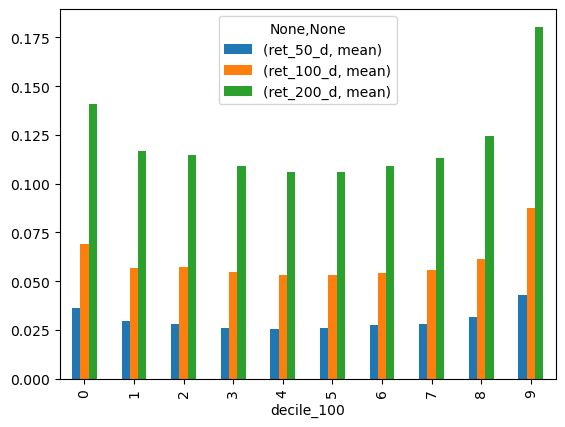

In [142]:
result_ma_100.plot.bar(x="decile_100", y=[("ret_50_d", "mean"), ("ret_100_d", "mean"), ("ret_200_d", "mean"),])

<Axes: xlabel='decile_100'>

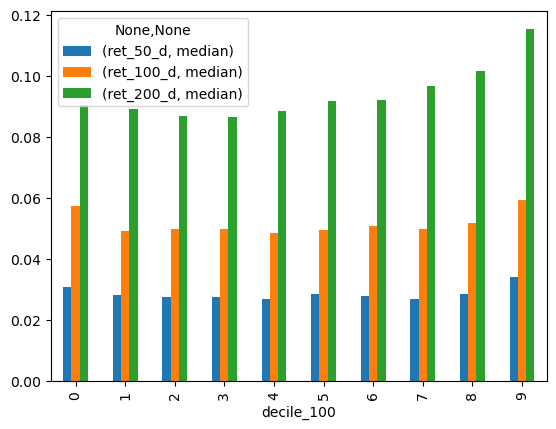

In [143]:
result_ma_100.plot.bar(x="decile_100", y=[("ret_50_d", "median"), ("ret_100_d", "median"), ("ret_200_d", "median"),])


<Axes: xlabel='decile_200'>

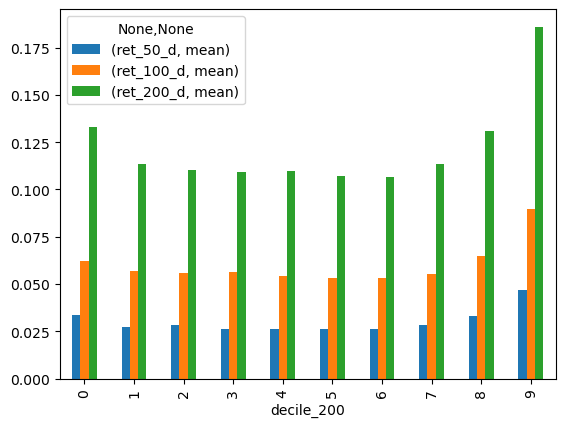

In [144]:
result_ma_200.plot.bar(x="decile_200", y=[("ret_50_d", "mean"), ("ret_100_d", "mean"), ("ret_200_d", "mean"),])

<Axes: xlabel='decile_200'>

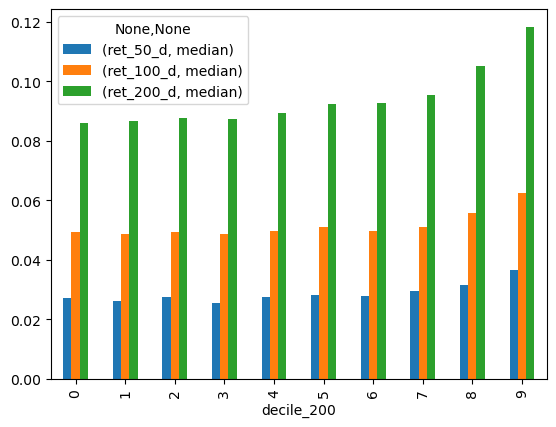

In [145]:
result_ma_200.plot.bar(x="decile_200", y=[("ret_50_d", "median"), ("ret_100_d", "median"), ("ret_200_d", "median"),])
